In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/pbl555/dataset8_cuong.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [10]:
train_path = "/content/dataset/dataset8_cuong/train"
val_path = "/content/dataset/dataset8_cuong/validation"
test_path = "/content/dataset/dataset8_cuong/test"

In [29]:
data_train = tf.keras.utils.image_dataset_from_directory(train_path, image_size=(224, 224), validation_split=False, batch_size=64, shuffle=True)

Found 9636 files belonging to 8 classes.


In [30]:
data_cat = data_train.class_names
data_cat

['correct',
 'head_down',
 'head_left',
 'head_right',
 'leaning_left',
 'leaning_right',
 'left_hand_up',
 'right_hand_up']

In [31]:
data_val = tf.keras.utils.image_dataset_from_directory(val_path, image_size=(224, 224), validation_split=False, batch_size=32, shuffle=True)
data_val.class_names

Found 3193 files belonging to 8 classes.


['correct',
 'head_down',
 'head_left',
 'head_right',
 'leaning_left',
 'leaning_right',
 'left_hand_up',
 'right_hand_up']

In [32]:
data_test = tf.keras.utils.image_dataset_from_directory(test_path, image_size=(224, 224), validation_split=False, batch_size=32, shuffle=True)

Found 4842 files belonging to 8 classes.


In [33]:
# Scale data
def scale_data(image, label):
    # Convert image to float32
    image = tf.cast(image, tf.float32)
    # Scale image using Min-Max Scaling
    image = image / 255.0
    return image, label

# Apply scaling to datasets
scaled_data_train = data_train.map(scale_data)
scaled_data_val = data_val.map(scale_data)
scaled_data_test = data_test.map(scale_data)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


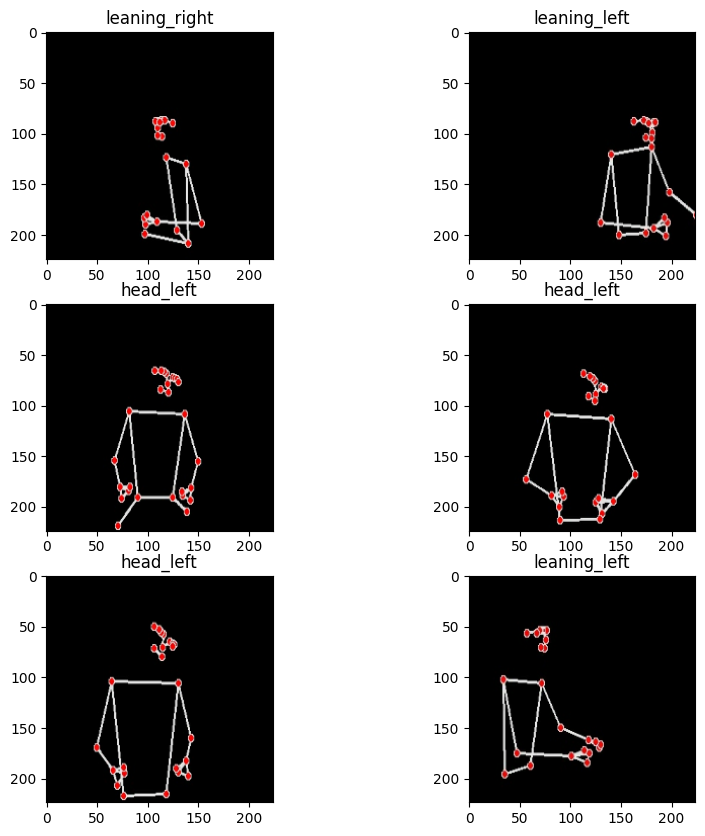

In [34]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
  for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    print(labels[i])

In [44]:
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1605696   
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
Total params: 21630600 (82.51 MB)
Trainable params: 1606216 (6.13 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [45]:
from keras.callbacks import EarlyStopping
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [46]:
history = model.fit(scaled_data_train, validation_data=scaled_data_val, epochs=100, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 66s 424ms/step - loss: 1.0547 - accuracy: 0.7185 - val_loss: 0.6303 - val_accuracy: 0.9233
Epoch 2/100
151/151 [==============================] - 62s 411ms/step - loss: 0.4661 - accuracy: 0.9094 - val_loss: 0.4725 - val_accuracy: 0.9183
Epoch 3/100
151/151 [==============================] - 67s 443ms/step - loss: 0.3288 - accuracy: 0.9427 - val_loss: 0.3663 - val_accuracy: 0.9280
Epoch 4/100
151/151 [==============================] - 68s 448ms/step - loss: 0.2674 - accuracy: 0.9537 - val_loss: 0.3163 - val_accuracy: 0.9374
Epoch 5/100
151/151 [==============================] - 63s 416ms/step - loss: 0.2293 - accuracy: 0.9611 - val_loss: 0.2863 - val_accuracy: 0.9430
Epoch 6/100
151/151 [==============================] - 69s 453ms/step - loss: 0.2024 - accuracy: 0.9667 - val_loss: 0.2698 - val_accuracy: 0.9330
Epoch 7/100
151/151 [==============================] - 69s 452ms/step - loss: 0.1795 - accuracy: 0.9714 - val_loss: 0.2195 -

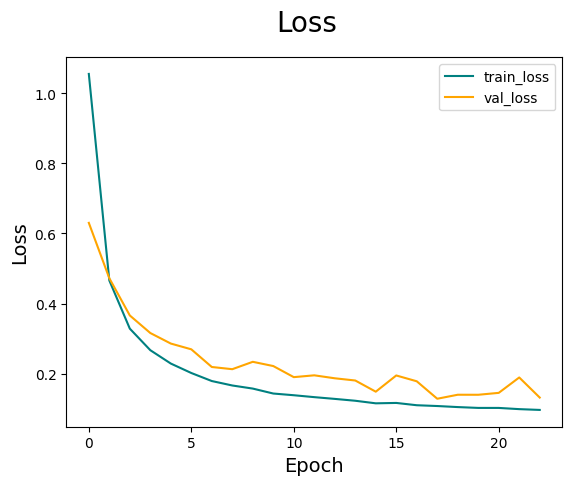

In [47]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='train_loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=14)  # Thêm nhãn cho cột x
plt.ylabel('Loss', fontsize=14)   # Thêm nhãn cho cột y
plt.legend(loc="upper right")
plt.show()

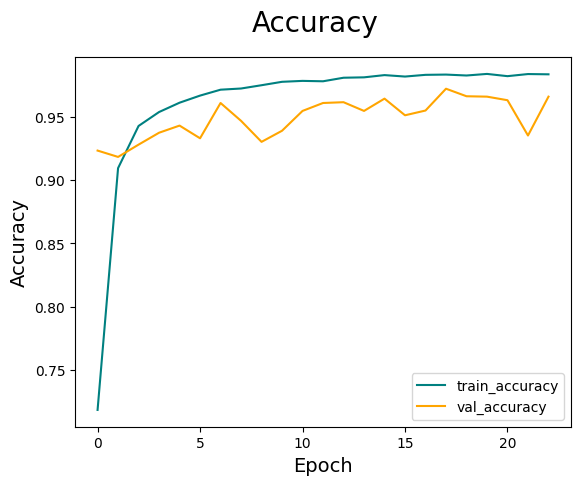

In [56]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='train_accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=14)  # Thêm nhãn cho cột x
plt.ylabel('Accuracy', fontsize=14)   # Thêm nhãn cho cột y
plt.legend(loc="lower right")
plt.show()

In [49]:
model.evaluate(scaled_data_test)

152/152 [==============================] - 28s 179ms/step - loss: 0.2008 - accuracy: 0.9447


[0.20082490146160126, 0.9446509480476379]

In [50]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test batches
for batch in scaled_data_test.as_numpy_iterator():
    X, y = batch
    # Perform prediction using the model
    yhat = model.predict(X)
    # Convert predicted probabilities to labels
    y_pred = np.argmax(yhat, axis=-1)
    # Append true labels and predicted labels
    true_labels.extend(y)
    predicted_labels.extend(y_pred)

# Calculate precision, recall, and accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Print the evaluation metrics
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')


1/1 [==============================] - 0s 189ms/step
Precision: 0.9513126411291092, Recall: 0.9446509706732755, Accuracy: 0.9446509706732755


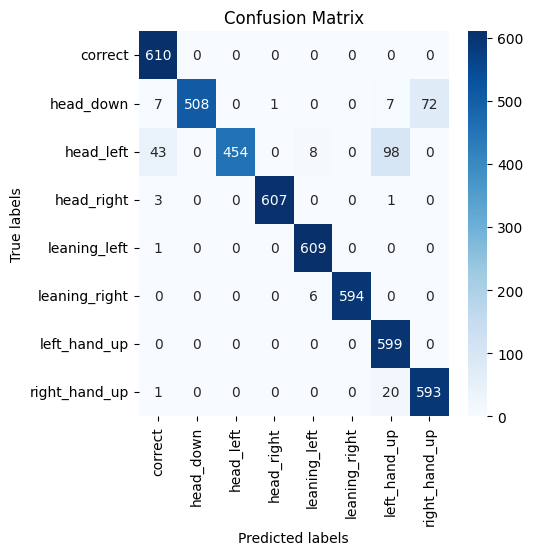

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tạo ma trận confusion
cm = confusion_matrix(true_labels, predicted_labels)

# Tạo plot cho ma trận confusion
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [52]:
model.evaluate(scaled_data_val)

100/100 [==============================] - 16s 159ms/step - loss: 0.1290 - accuracy: 0.9721


[0.12900057435035706, 0.9721265435218811]

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test batches
for batch in scaled_data_val.as_numpy_iterator():
    X, y = batch
    # Perform prediction using the model
    yhat = model.predict(X)
    # Convert predicted probabilities to labels
    y_pred = np.argmax(yhat, axis=-1)
    # Append true labels and predicted labels
    true_labels.extend(y)
    predicted_labels.extend(y_pred)

# Calculate precision, recall, and accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Print the evaluation metrics
print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tạo ma trận confusion
cm = confusion_matrix(true_labels, predicted_labels)

# Tạo plot cho ma trận confusion
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [55]:
model.save('/content/drive/MyDrive/pbl555/vgg19_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
